In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# load zip code level data
zips = pd.read_excel('source/first_street/Copy of Press_Export_Precipitation_Problem.xlsx', sheet_name='Zip Code Data')

# load tract level data
tract = pd.read_excel('source/first_street/Copy of Press_Export_Precipitation_Problem.xlsx', sheet_name='Census Tract Data')

In [3]:
zips.head()

,fips,Zip Code,State,Total Properties,Depth_1in100_NOAA,Depth_1in100_FSF2023,Depth_1in100_FSF2053,RP_1in10_FSF2023,RP_1in20_FSF2023,RP_1in50_FSF2023,...,RP_1in10_FSF2053,RP_1in20_FSF2053,RP_1in50_FSF2053,RP_1in100_FSF2053,Properties in SFHA,"Properties in FSF 100 Year Zone, 2023","Properties in FSF 100 Year Zone, 2053",Properties in FSF 100 Year Zone but Not in FEMA SFHA,"Properties in FSF 100 Year Zone but Not in FEMA SFHA, Primary Flood Source is Pluvial",Properties in FEMA SFHA but not FSF 100 Year Zone
0,1001,1001,ma,5250.0,68.4,75.3,78.5,9.5,23.2,35.7,...,8.0,19.3,29.4,55.1,424.0,1098.0,1167.0,680.0,85.0,6.0
1,1002,1002,ma,7051.0,62.2,74.4,77.6,7.2,16.5,25.5,...,5.8,13.7,21.2,37.8,96.0,409.0,432.0,325.0,244.0,12.0
2,1003,1003,ma,16.0,63.0,74.5,77.8,7.5,17.0,26.5,...,6.5,14.0,21.5,40.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1005,1005,ma,2837.0,60.2,74.6,77.5,6.8,14.5,22.8,...,5.7,12.2,19.0,33.1,0.0,276.0,293.0,276.0,173.0,0.0
4,1007,1007,ma,6542.0,61.5,73.1,76.1,7.6,17.4,26.8,...,6.4,14.3,22.5,39.4,57.0,356.0,382.0,334.0,266.0,35.0


In [5]:
tract.head()

,fips,Census Tract,State,Total Properties,Depth_1in100_NOAA,Depth_1in100_FSF2023,Depth_1in100_FSF2053,RP_1in10_FSF2023,RP_1in20_FSF2023,RP_1in50_FSF2023,...,RP_1in10_FSF2053,RP_1in20_FSF2053,RP_1in50_FSF2053,RP_1in100_FSF2053,Properties in SFHA,"Properties in FSF 100 Year Zone, 2023","Properties in FSF 100 Year Zone, 2053",Properties in FSF 100 Year Zone but Not in FEMA SFHA,"Properties in FSF 100 Year Zone but Not in FEMA SFHA, Primary Flood Source is Pluvial",Properties in FEMA SFHA but not FSF 100 Year Zone
0,1001020100,1001020100,al,938.0,88.0,98.5,102.7,6.0,16.1,25.4,...,4.9,12.9,20.2,42.7,148.0,209.0,209.0,72.0,47.0,11.0
1,1001020200,1001020200,al,1136.0,88.0,99.3,103.5,6.0,15.0,24.0,...,4.0,12.0,19.0,40.8,151.0,267.0,282.0,125.0,52.0,9.0
2,1001020300,1001020300,al,1511.0,88.0,99.3,103.6,6.0,15.0,24.0,...,4.0,12.0,19.0,40.8,7.0,87.0,93.0,80.0,60.0,0.0
3,1001020400,1001020400,al,1887.0,88.0,99.3,103.5,6.0,15.0,24.0,...,4.1,12.0,19.0,40.9,30.0,155.0,158.0,125.0,125.0,0.0
4,1001020501,1001020501,al,1754.0,88.0,96.7,100.8,7.3,18.0,28.7,...,6.0,14.3,22.7,48.3,2.0,51.0,55.0,50.0,50.0,1.0


In [6]:
# load census tract map
tract_map = gpd.read_file('/home/aqin/Documents/stories/geographies/illinois_census_tracts_2020/tl_2020_17_tract.shp')

In [7]:
tract_map.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,031,510300,17031510300,5103,Census Tract 5103,G5020,S,2958348,0,+41.7157373,-087.5749771,"POLYGON ((-87.58745 41.72327, -87.58699 41.723..."
1,17,031,520100,17031520100,5201,Census Tract 5201,G5020,S,2581898,521681,+41.7211184,-087.5294325,"POLYGON ((-87.54292 41.72391, -87.54276 41.724..."
2,17,097,863006,17097863006,8630.06,Census Tract 8630.06,G5020,S,207264,0,+42.3003410,-087.8538353,"POLYGON ((-87.85621 42.29921, -87.85604 42.299..."
3,17,097,863004,17097863004,8630.04,Census Tract 8630.04,G5020,S,4440910,0,+42.3046642,-087.8642654,"POLYGON ((-87.87635 42.30871, -87.87565 42.308..."
4,17,097,866200,17097866200,8662,Census Tract 8662,G5020,S,32717452,584438,+42.2360556,-087.9107093,"POLYGON ((-87.94467 42.24049, -87.94088 42.240..."


In [8]:
# convert merge field to int
tract_map['GEOID'] = tract_map['GEOID'].astype(int)

In [9]:
# merge on GEOID and fips
tract_map = tract_map.merge(tract, left_on='GEOID', right_on='fips', how='inner')

<AxesSubplot:>

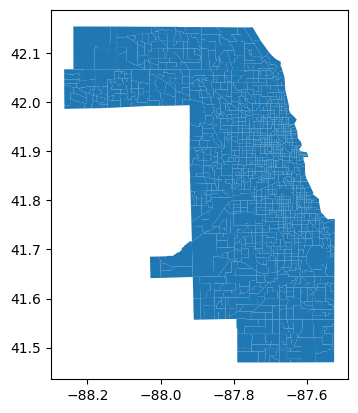

In [10]:
# plot just cook county
tract_map[tract_map['COUNTYFP'] == '031'].plot()

In [11]:
# create county map
cook_tract_map = tract_map[tract_map['COUNTYFP'] == '031'].copy()

In [12]:
# create extra cols for viz

# create a pct of properties in SFHA
cook_tract_map['pct_sfha'] = cook_tract_map['Properties in SFHA']/cook_tract_map['Total Properties']

# create a pct of properties in FSF 100 year flood zone 2023
cook_tract_map['pct_fsf'] = cook_tract_map['Properties in FSF 100 Year Zone, 2023']/cook_tract_map['Total Properties']

# create a pct of properties at risk = not in SFHA but in FSF
cook_tract_map['pct_risk'] = cook_tract_map['Properties in FSF 100 Year Zone but Not in FEMA SFHA']/cook_tract_map['Total Properties']

In [18]:
cook_tract_map.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,RP_1in50_FSF2053,RP_1in100_FSF2053,Properties in SFHA,"Properties in FSF 100 Year Zone, 2023","Properties in FSF 100 Year Zone, 2053",Properties in FSF 100 Year Zone but Not in FEMA SFHA,"Properties in FSF 100 Year Zone but Not in FEMA SFHA, Primary Flood Source is Pluvial",Properties in FEMA SFHA but not FSF 100 Year Zone,pct_sfha,pct_risk
0,17,031,510300,17031510300,5103,Census Tract 5103,G5020,S,2958348,0,...,15.8,28.0,0.0,102.0,163.0,102.0,36.0,0.0,0.048068,0.048068
1,17,031,520100,17031520100,5201,Census Tract 5201,G5020,S,2581898,521681,...,17.0,30.0,7.0,211.0,230.0,210.0,206.0,6.0,0.293872,0.292479
5,17,031,590700,17031590700,5907,Census Tract 5907,G5020,S,869830,12614,...,14.1,25.0,0.0,260.0,367.0,260.0,260.0,0.0,0.321782,0.321782
6,17,031,600400,17031600400,6004,Census Tract 6004,G5020,S,327229,0,...,13.0,23.0,0.0,87.0,91.0,87.0,87.0,0.0,0.112113,0.112113
10,17,031,824115,17031824115,8241.15,Census Tract 8241.15,G5020,S,2683154,42699,...,15.0,29.0,1.0,62.0,64.0,61.0,61.0,0.0,0.058879,0.057930


In [21]:
# export cook county map as a geojson
cook_tract_map.to_file('processed/cook_tract_map_fsf.geojson', driver='GeoJSON')

In [96]:
# load cook county zip code map
zips_map = gpd.read_file('/home/aqin/Documents/stories/geographies/cook_county_zipcodes_2020.geojson')

In [97]:
zips_map.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,ZCTA,geometry
0,60004,60004,B5,G6350,S,28793520,70451,+42.1127796,-087.9795423,60004,"MULTIPOLYGON (((-87.95147 42.13160, -87.95135 ..."
1,60016,60016,B5,G6350,S,31398113,404155,+42.0527193,-087.8920607,60016,"POLYGON ((-87.94164 42.03554, -87.94164 42.035..."
2,60022,60022,B5,G6350,S,9822070,3581879,+42.1361375,-087.7604742,60022,"POLYGON ((-87.79008 42.14016, -87.79008 42.140..."
3,60025,60025,B5,G6350,S,27169909,109657,+42.0746321,-087.8115810,60025,"POLYGON ((-87.87851 42.08715, -87.87850 42.087..."
4,60056,60056,B5,G6350,S,28141849,11685,+42.0653782,-087.9347101,60056,"POLYGON ((-87.97497 42.05706, -87.97497 42.057..."


In [98]:
# convert merge field to int
zips_map['ZCTA'] = zips_map['ZCTA'].astype(int)

In [99]:
# merge on GEOID and fips
cook_zips_map = zips_map.merge(zips, left_on='ZCTA', right_on='Zip Code', how='inner')

In [100]:
cook_zips_map.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,ZCTA,...,RP_1in10_FSF2053,RP_1in20_FSF2053,RP_1in50_FSF2053,RP_1in100_FSF2053,Properties in SFHA,"Properties in FSF 100 Year Zone, 2023","Properties in FSF 100 Year Zone, 2053",Properties in FSF 100 Year Zone but Not in FEMA SFHA,"Properties in FSF 100 Year Zone but Not in FEMA SFHA, Primary Flood Source is Pluvial",Properties in FEMA SFHA but not FSF 100 Year Zone
0,60004,60004,B5,G6350,S,28793520,70451,+42.1127796,-087.9795423,60004,...,6.4,13.6,20.6,38.0,28.0,1370.0,1465.0,1353.0,713.0,11.0
1,60016,60016,B5,G6350,S,31398113,404155,+42.0527193,-087.8920607,60016,...,6.0,13.0,19.9,36.7,1121.0,2065.0,2149.0,1112.0,780.0,168.0
2,60022,60022,B5,G6350,S,9822070,3581879,+42.1361375,-087.7604742,60022,...,4.0,8.4,12.8,23.2,15.0,216.0,231.0,207.0,113.0,6.0
3,60025,60025,B5,G6350,S,27169909,109657,+42.0746321,-087.8115810,60025,...,4.8,10.4,15.6,28.7,172.0,1100.0,1325.0,956.0,397.0,28.0
4,60056,60056,B5,G6350,S,28141849,11685,+42.0653782,-087.9347101,60056,...,6.0,13.0,20.0,37.2,198.0,1152.0,1256.0,1090.0,709.0,136.0


In [101]:
# create extra cols for viz

# create a pct of properties in SFHA
cook_zips_map['pct_sfha'] = cook_zips_map['Properties in SFHA']/cook_zips_map['Total Properties']

# create a pct of properties in FSF 100 year flood zone 2023
cook_zips_map['pct_fsf'] = cook_zips_map['Properties in FSF 100 Year Zone, 2023']/cook_zips_map['Total Properties']

# create a pct of properties at risk = not in SFHA but in FSF
cook_zips_map['pct_risk'] = cook_zips_map['Properties in FSF 100 Year Zone but Not in FEMA SFHA']/cook_zips_map['Total Properties']

In [102]:
# export cook county zips map as a geojson
cook_zips_map.to_file('processed/cook_zips_map_fsf.geojson', driver='GeoJSON')

In [107]:
cook_zips_map.sort_values('pct_fsf', ascending=False).head(10)

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,ZCTA,...,RP_1in100_FSF2053,Properties in SFHA,"Properties in FSF 100 Year Zone, 2023","Properties in FSF 100 Year Zone, 2053",Properties in FSF 100 Year Zone but Not in FEMA SFHA,"Properties in FSF 100 Year Zone but Not in FEMA SFHA, Primary Flood Source is Pluvial",Properties in FEMA SFHA but not FSF 100 Year Zone,pct_sfha,pct_fsf,pct_risk
95,60165,60165,B5,G6350,S,884536,0,+41.9032344,-087.8807317,60165,...,25.0,508.0,967.0,959.0,468.0,4.0,9.0,0.404459,0.769904,0.372611
106,60445,60445,B5,G6350,S,11117599,0,+41.6283273,-087.7353696,60445,...,30.9,542.0,2736.0,2784.0,2383.0,86.0,189.0,0.094491,0.476987,0.415446
59,60472,60472,B5,G6350,S,4376403,83020,+41.6430745,-087.7080819,60472,...,31.0,1085.0,2479.0,2551.0,1446.0,64.0,52.0,0.186490,0.426091,0.248539
79,60141,60141,B5,G6350,S,1087815,0,+41.8583442,-087.8379105,60141,...,26.0,0.0,5.0,6.0,5.0,5.0,0.0,0.000000,0.384615,0.384615
94,60160,60160,B5,G6350,S,11789138,0,+41.9034912,-087.8617696,60160,...,24.9,809.0,2417.0,2416.0,1631.0,52.0,23.0,0.127221,0.380091,0.256487
132,60469,60469,B5,G6350,S,2936197,0,+41.6286972,-087.6863116,60469,...,29.8,137.0,817.0,828.0,809.0,39.0,129.0,0.047986,0.286165,0.283363
46,60090,60090,B5,G6350,S,23265997,150683,+42.1258780,-087.9119540,60090,...,35.6,342.0,2039.0,2052.0,1807.0,149.0,110.0,0.047166,0.281203,0.249207
126,60465,60465,B5,G6350,S,11148614,14181,+41.7006815,-087.8252968,60465,...,31.0,96.0,1276.0,1361.0,1193.0,163.0,13.0,0.020430,0.271547,0.253884
45,60018,60018,B5,G6350,S,42944312,418357,+41.9788715,-087.8943420,60018,...,34.1,306.0,2396.0,2383.0,2103.0,216.0,13.0,0.033446,0.261887,0.229861
18,60659,60659,B5,G6350,S,6111522,2818,+41.9895781,-087.7065715,60659,...,20.0,2.0,1636.0,1777.0,1634.0,666.0,0.0,0.000301,0.246608,0.246307


# analysis for story below

In [30]:
fsf_county = pd.read_excel('source/first_street/Copy of Press_Export_Precipitation_Problem.xlsx', sheet_name='County Data')

In [51]:
fsf_county.sort_values('Properties in FSF 100 Year Zone but Not in FEMA SFHA', ascending=False).head()

,fips,County FIPS,County Name,State,Total Properties,Depth_1in100_NOAA,Depth_1in100_FSF2023,Depth_1in100_FSF2053,RP_1in10_FSF2023,RP_1in20_FSF2023,...,RP_1in10_FSF2053,RP_1in20_FSF2053,RP_1in50_FSF2053,RP_1in100_FSF2053,Properties in SFHA,"Properties in FSF 100 Year Zone, 2023","Properties in FSF 100 Year Zone, 2053",Properties in FSF 100 Year Zone but Not in FEMA SFHA,"Properties in FSF 100 Year Zone but Not in FEMA SFHA, Primary Flood Source is Pluvial",Properties in FEMA SFHA but not FSF 100 Year Zone
0,48201,48201,Harris,tx,1386948.0,123.2,198.9,192.5,2.0,4.6,...,2.1,5.3,8.3,15.5,137289.0,393008.0,369165.0,297007.0,213385.0,41288.0
1,17031,17031,Cook,il,1413243.0,77.9,102.1,105.0,5.4,11.5,...,4.7,10.2,15.5,28.7,21958.0,171658.0,188944.0,158662.0,127346.0,8962.0
2,48157,48157,Fort Bend,tx,332233.0,117.9,189.2,183.7,2.1,4.8,...,2.4,5.6,8.4,15.3,12974.0,122983.0,116446.0,115538.0,56344.0,5529.0
3,6037,6037,Los Angeles,ca,2093870.0,47.3,51.2,50.6,13.6,31.5,...,15.1,34.8,54.2,101.5,26065.0,126587.0,131181.0,115458.0,46868.0,14936.0
4,42101,42101,Philadelphia,pa,547271.0,74.7,122.8,127.9,3.7,7.3,...,3.1,6.0,8.4,13.2,2472.0,109978.0,115624.0,107840.0,94823.0,334.0


Less than 1% of properties in Chicago are in the Federal Emergency Management Agency’s (FEMA) high-risk flood zone

In [ ]:
fsf_city = pd.read_excel('source/first_street/Copy of Press_Export_Precipitation_Problem.xlsx', sheet_name='City Data')

In [41]:
chi_total_properties = fsf_city[(fsf_city['City Name'] == 'Chicago')]['Total Properties']
chi_total_properties

3    604288.0
Name: Total Properties, dtype: float64

In [42]:
chi_sfha_properties = fsf_city[(fsf_city['City Name'] == 'Chicago')]['Properties in SFHA']
chi_sfha_properties

3    1543.0
Name: Properties in SFHA, dtype: float64

In [50]:
(chi_sfha_properties/chi_total_properties)*1

3    0.002553
dtype: float64

Just 1.5% of properties in Cook County are in the Federal Emergency Management Agency’s (FEMA) high-risk flood zone

In [27]:
cook_total_properties = fsf_county[(fsf_county['County Name'] == 'Cook') & (fsf_county['State'] == 'il')]['Total Properties']

In [44]:
cook_sfha_properties = fsf_county[(fsf_county['County Name'] == 'Cook') & (fsf_county['State'] == 'il')]['Properties in SFHA']
cook_sfha_properties

1    21958.0
Name: Properties in SFHA, dtype: float64

In [34]:
(cook_sfha_properties/cook_total_properties)*100

1    1.553731
dtype: float64

Roughly 172,000 properties in Cook County have a high risk of flooding — about seven times more than what FEMA’s maps show

In [43]:
cook_fsf_properties = fsf_county[(fsf_county['County Name'] == 'Cook') & (fsf_county['State'] == 'il')]['Properties in FSF 100 Year Zone, 2023']
cook_fsf_properties

1    171658.0
Name: Properties in FSF 100 Year Zone, 2023, dtype: float64

In [45]:
cook_fsf_properties/cook_sfha_properties

1    7.817561
dtype: float64

 In the city of Chicago, roughly 79,000 properties are at high risk. That’s more than 50 times higher than FEMA’s map.  


In [48]:
chi_fsf_properties = fsf_city[(fsf_city['City Name'] == 'Chicago')]['Properties in FSF 100 Year Zone, 2023']
chi_fsf_properties

3    78949.0
Name: Properties in FSF 100 Year Zone, 2023, dtype: float64

In [49]:
chi_fsf_properties/chi_sfha_properties

3    51.165911
dtype: float64

nd not flood risk from heavy rainfall, the type that impacts an inland urban area with miles of impermeable concrete like Chicago the most. 


In [52]:
cook_pluvial_properties = fsf_county[(fsf_county['County Name'] == 'Cook') & (fsf_county['State'] == 'il')]['Properties in FSF 100 Year Zone but Not in FEMA SFHA, Primary Flood Source is Pluvial']

In [54]:
cook_pluvial_properties/cook_fsf_properties 

1    0.741859
dtype: float64

# create a cook county ZIP code map

In [48]:
# create a cook zips
df = gpd.read_file('/home/aqin/Documents/stories/geographies/tl_2020_us_zcta520.shp')

In [49]:
df.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [54]:
df['ZCTA5CE20'] = df['ZCTA5CE20'].astype(int)

In [87]:
# load list of zip codes in cook county
zip_list = pd.read_csv('/home/aqin/Documents/stories/geographies/Cook County ZCTA List.csv')

In [88]:
zip_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ZCTA Full  178 non-null    object
 1   ZCTA       178 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [90]:
zip_list[zip_list['ZCTA'] == 60418]

,ZCTA Full,ZCTA
177,ZCTA 60418,60418


In [91]:
cook_zips_map = df.merge(zip_list[['ZCTA']], left_on='ZCTA5CE20', right_on='ZCTA', how='inner')

In [92]:
cook_zips_map.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,ZCTA
0,60004,60004,B5,G6350,S,28793520,70451,+42.1127796,-087.9795423,"MULTIPOLYGON (((-87.95147 42.13160, -87.95135 ...",60004
1,60016,60016,B5,G6350,S,31398113,404155,+42.0527193,-087.8920607,"POLYGON ((-87.94164 42.03554, -87.94164 42.035...",60016
2,60022,60022,B5,G6350,S,9822070,3581879,+42.1361375,-087.7604742,"POLYGON ((-87.79008 42.14016, -87.79008 42.140...",60022
3,60025,60025,B5,G6350,S,27169909,109657,+42.0746321,-087.8115810,"POLYGON ((-87.87851 42.08715, -87.87850 42.087...",60025
4,60056,60056,B5,G6350,S,28141849,11685,+42.0653782,-087.9347101,"POLYGON ((-87.97497 42.05706, -87.97497 42.057...",60056


In [93]:
len(zips_map)

168

<AxesSubplot:>

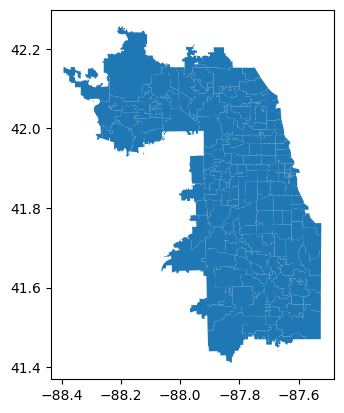

In [94]:
cook_zips_map.plot()

In [86]:
df[df['ZCTA5CE20'] == 60418]

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
9514,60418,60418,B5,G6350,S,7665394,162425,+41.6455985,-087.7400776,"POLYGON ((-87.76299 41.65478, -87.76293 41.656..."


In [95]:
# export
cook_zips_map.to_file('processed/cook_county_zipcodes_2020.geojson', driver='GeoJSON')